# Analisando as notas dos filmes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
notas = pd.read_csv('ml-latest-small/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns =['filmeId', 'titulo', 'genero']

In [3]:
display(notas.info())
display(filmes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   titulo   9742 non-null   object
 2   genero   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None

In [4]:
print(f'A média das notas é {notas.nota.mean()}')
print(f'A mediana das notas é {notas.nota.median()}')

A média das notas é 3.501556983616962
A mediana das notas é 3.5


In [5]:
print(notas.query('filmeId==1').mean().nota)
print(notas.query('filmeId==2').mean().nota)

3.9209302325581397
3.4318181818181817


In [6]:
notas.groupby('filmeId').mean().nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

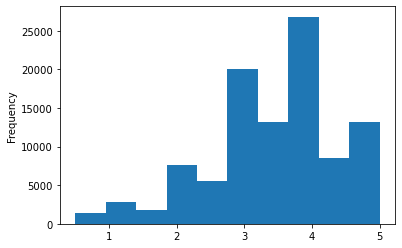

In [7]:
notas.nota.plot(kind='hist')
notas.nota.describe()

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


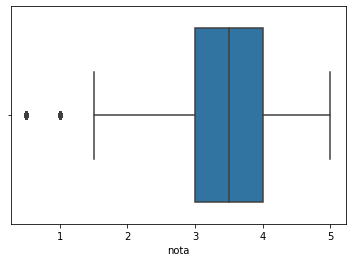

In [8]:
sns.boxplot(notas.nota)

In [9]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

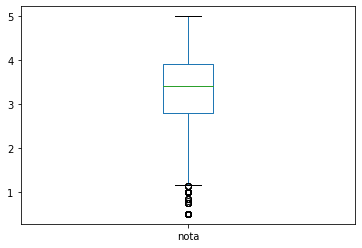

In [10]:
# Boxplot do pandas
medias_por_filme.plot(kind='box')

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


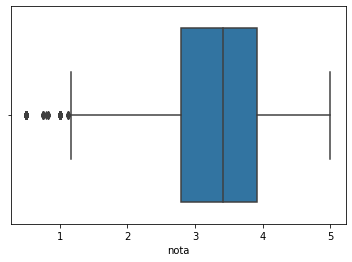

In [11]:
sns.boxplot(medias_por_filme)

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


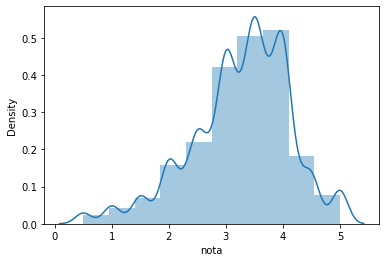

In [12]:
sns.distplot(medias_por_filme, bins=10)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

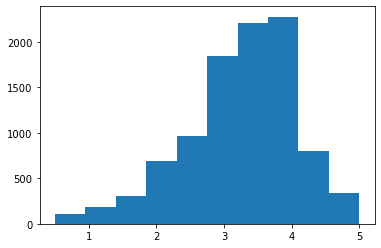

In [13]:
plt.hist(medias_por_filme)

In [14]:
tmdb = pd.read_csv('archive/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [15]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [16]:
nota_media = tmdb.groupby('original_title').mean().vote_average

(array([6.300e+01, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+01, 1.100e+01,
        3.700e+01, 4.700e+01, 1.160e+02, 2.400e+02, 4.710e+02, 8.310e+02,
        1.025e+03, 9.590e+02, 6.500e+02, 2.520e+02, 7.700e+01, 2.000e+00,
        1.000e+00, 5.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

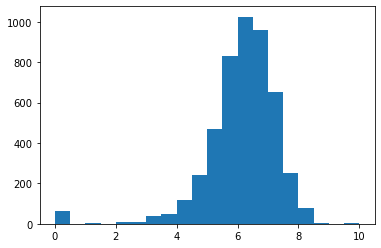

In [17]:
plt.hist(nota_media, bins=20)

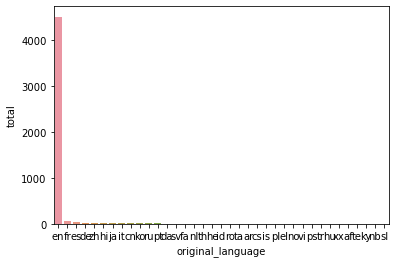

In [18]:
contagem_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_linguas.columns = ['original_language', 'total']
sns.barplot(x = 'original_language', y = 'total',data = contagem_linguas)

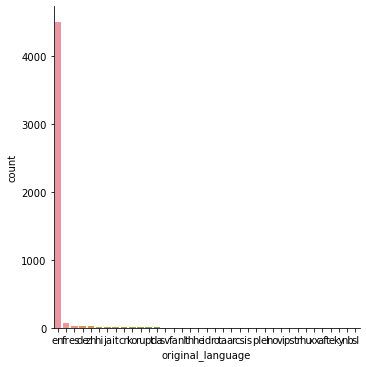

In [22]:
sns.catplot(x = 'original_language', kind='count', order = tmdb.original_language.value_counts().index, data = tmdb)

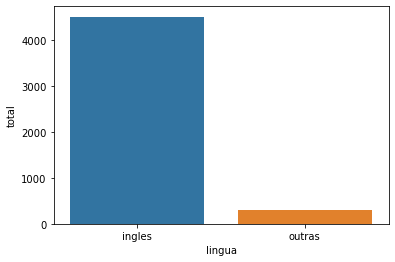

In [98]:
total_linguas = pd.DataFrame(tmdb['original_language'].value_counts()).reset_index()
total_linguas.columns = ['lingua','total']
total_outras_linguas = total_linguas[total_linguas['lingua'] != 'en']['total'].sum()
total_ingles = total_linguas[total_linguas['lingua'] == 'en']['total'].sum()


resumo_linguas = {
    'lingua': ['ingles', 'outras'],
    'total': [total_ingles, total_outras_linguas]
}
resumo_linguas = pd.DataFrame(resumo_linguas)
sns.barplot(x='lingua', y='total', data = resumo_linguas)



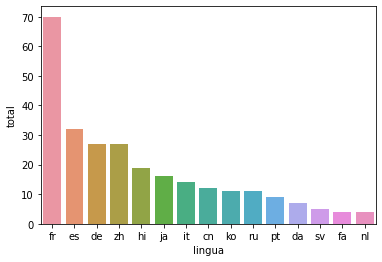

In [101]:
outras_linguas = {
    'lingua': total_linguas[total_linguas['lingua'] != 'en']['lingua'][0:15],
    'total': total_linguas[total_linguas['lingua'] != 'en']['total'][0:15]
}
outras_linguas = pd.DataFrame(outras_linguas)
sns.barplot(x='lingua', y='total', data = outras_linguas)

Text(0.5, 0.98, 'Filmes com língua original diferente de inglês')

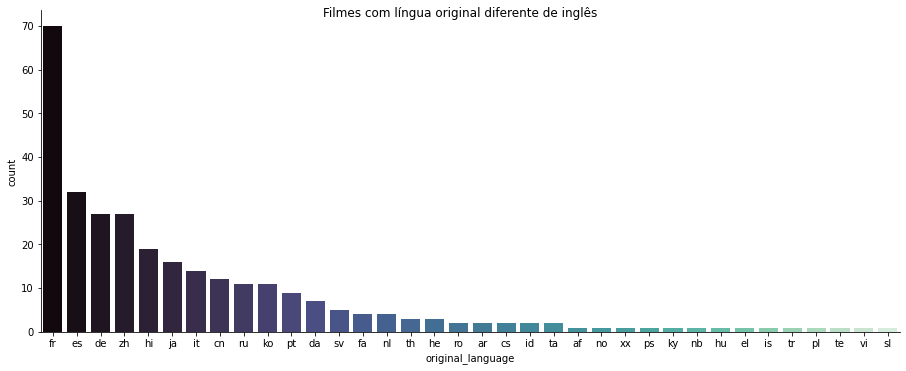

In [121]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
contagem_dos_filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")['original_language'].value_counts()
sns.catplot(x='original_language',
            kind='count',
            data=filmes_sem_lingua_original_em_ingles,
            aspect=2.5,
            palette='mako',
            order=contagem_dos_filmes_sem_lingua_original_em_ingles.index).fig.suptitle('Filmes com língua original diferente de inglês')

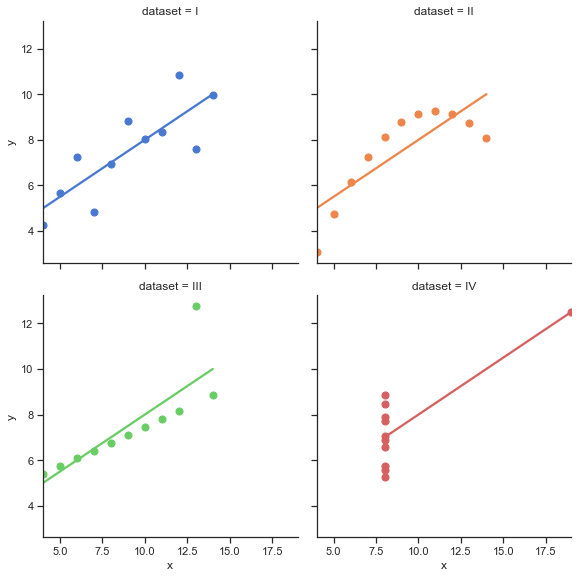

In [122]:
# Gráficos lineares
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [124]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [129]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")

In [136]:
print('Nota média do Toy Story %.2f' %notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' %notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [137]:
print('Nota mediana do Toy Story %.2f' %notas_do_toy_story.nota.median())
print('Nota mediana do Jumanji %.2f' %notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [138]:
print('Desvio padrão da nota do Toy Story %.2f' %notas_do_toy_story.nota.std())
print('Desvio padrão da nota do Jumanji %.2f' %notas_do_jumanji.nota.std())

Desvio padrão da nota do Toy Story 0.83
Desvio padrão da nota do Jumanji 0.88


C:\Users\thiag\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x197ad27d220>,
 'caps': [<matplotlib.lines.Line2D at 0x197ad27d8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x197ad155e50>,
 'medians': [<matplotlib.lines.Line2D at 0x197ad27dfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x197ad3092e0>,
 'means': []}

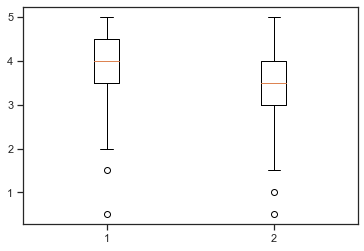

In [141]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

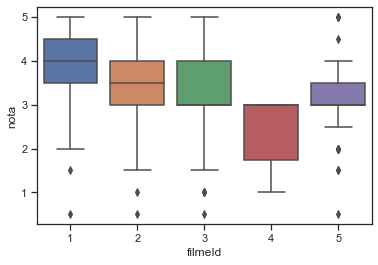

In [143]:
sns.boxplot(x= 'filmeId', y='nota', data = notas.query('filmeId in [1,2,3,4,5]'))